In [1]:
import pandas as pd

#Read in data files
gene_expression_extraction = pd.read_csv('gene_expression_extraction2.csv')
gdc_sample_sheet = pd.read_csv('gdc_sample_sheet.2024-03-16.csv')

#Merge the two dataframes based on the 'sample_id' and 'File ID' columns
merged_df = pd.merge(gene_expression_extraction, gdc_sample_sheet, how='left', left_on='sample_id', right_on='File ID')

#Drop FileID Column
merged_df.drop('File ID', axis=1, inplace=True)
merged_df.rename(columns={'Case ID': 'Case_ID'}, inplace=True)

#Save to merged CSV
merged_df.to_csv('merged2_gene_expression_extraction.csv', index=False)

In [2]:

merged_gene_expression_extraction = pd.read_csv('merged2_gene_expression_extraction.csv')
clinical_data = pd.read_csv('clinical.csv')
merged_df = pd.merge(merged_gene_expression_extraction, clinical_data, how='left', left_on='Case_ID', right_on='case_submitter_id')
merged_df.drop('case_submitter_id', axis=1, inplace=True)

#Remove redundant rows
merged_df = merged_df.iloc[::2]

merged_df.to_csv('merged2_gene_expression_clinical.csv', index=False)

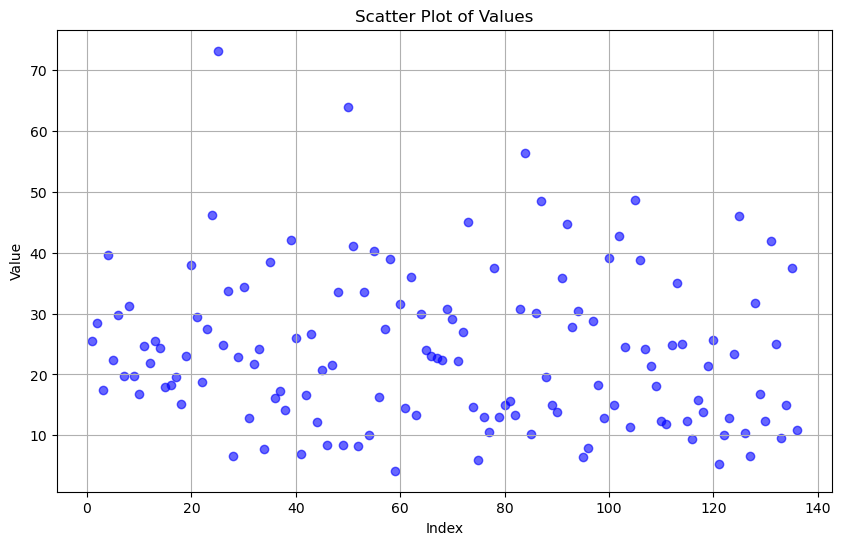

In [9]:
import matplotlib.pyplot as plt

#Test data
values = [
    25.5062, 28.4072, 17.5051, 39.6903, 22.3707, 29.7268, 19.7079, 31.2419, 19.7477, 16.876,
    24.7047, 21.8626, 25.5068, 24.3238, 18.0031, 18.2688, 19.5852, 15.1648, 23.0302, 38.0333,
    29.415, 18.7589, 27.4094, 46.2146, 73.1992, 24.8384, 33.6616, 6.5463, 22.8645, 34.4541,
    12.8576, 21.6647, 24.1873, 7.7607, 38.4513, 16.2004, 17.3409, 14.1328, 42.0755, 25.9881,
    6.9576, 16.6379, 26.6406, 12.2661, 20.7626, 8.3798, 21.5732, 33.6178, 8.3336, 63.9744,
    41.0477, 8.169, 33.5826, 10.0934, 40.3046, 16.3791, 27.4512, 39.0541, 4.1884, 31.6322,
    14.4851, 36.0978, 13.3853, 29.8602, 24.0847, 22.9763, 22.6987, 22.4622, 30.6985, 29.1776,
    22.1988, 27.0623, 44.9795, 14.6934, 5.8961, 13.0279, 10.5194, 37.5448, 12.9344, 14.9357,
    15.6259, 13.3408, 30.8098, 56.3672, 10.176, 30.1081, 48.462, 19.5678, 14.9521, 13.8173,
    35.7764, 44.6986, 27.7823, 30.5042, 6.4445, 7.9796, 28.8066, 18.3045, 12.9069, 39.1851,
    14.9401, 42.764, 24.4547, 11.2939, 48.6057, 38.7931, 24.1927, 21.4315, 18.0523, 12.3529,
    11.8102, 24.8242, 35.0012, 24.9327, 12.3143, 9.3338, 15.8868, 13.7571, 21.3684, 25.5956,
    5.305, 10.0062, 12.8457, 23.4489, 46.0934, 10.4148, 6.6134, 31.7124, 16.8469, 12.2825,
    41.9095, 24.9496, 9.6173, 15.0132, 37.5089, 10.9117
]
indices = range(1, len(values) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(indices, values, color='blue', alpha=0.6)
plt.title('Scatter Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [10]:
import math

#Test data
values = [
    25.5062, 28.4072, 17.5051, 39.6903, 22.3707, 29.7268, 19.7079, 31.2419, 19.7477, 16.876,
    24.7047, 21.8626, 25.5068, 24.3238, 18.0031, 18.2688, 19.5852, 15.1648, 23.0302, 38.0333,
    29.415, 18.7589, 27.4094, 46.2146, 73.1992, 24.8384, 33.6616, 6.5463, 22.8645, 34.4541,
    12.8576, 21.6647, 24.1873, 7.7607, 38.4513, 16.2004, 17.3409, 14.1328, 42.0755, 25.9881,
    6.9576, 16.6379, 26.6406, 12.2661, 20.7626, 8.3798, 21.5732, 33.6178, 8.3336, 63.9744,
    41.0477, 8.169, 33.5826, 10.0934, 40.3046, 16.3791, 27.4512, 39.0541, 4.1884, 31.6322,
    14.4851, 36.0978, 13.3853, 29.8602, 24.0847, 22.9763, 22.6987, 22.4622, 30.6985, 29.1776,
    22.1988, 27.0623, 44.9795, 14.6934, 5.8961, 13.0279, 10.5194, 37.5448, 12.9344, 14.9357,
    15.6259, 13.3408, 30.8098, 56.3672, 10.176, 30.1081, 48.462, 19.5678, 14.9521, 13.8173,
    35.7764, 44.6986, 27.7823, 30.5042, 6.4445, 7.9796, 28.8066, 18.3045, 12.9069, 39.1851,
    14.9401, 42.764, 24.4547, 11.2939, 48.6057, 38.7931, 24.1927, 21.4315, 18.0523, 12.3529,
    11.8102, 24.8242, 35.0012, 24.9327, 12.3143, 9.3338, 15.8868, 13.7571, 21.3684, 25.5956,
    5.305, 10.0062, 12.8457, 23.4489, 46.0934, 10.4148, 6.6134, 31.7124, 16.8469, 12.2825,
    41.9095, 24.9496, 9.6173, 15.0132, 37.5089, 10.9117
]

# Calculate log (base 2) of each value
log_values = [math.log2(value) for value in values]

# Output the log (base 2) of each value
for i, log_value in enumerate(log_values, 1):
    print(f"Value {i}: {log_value}")


Value 1: 4.672776072247327
Value 2: 4.828184731934351
Value 3: 4.129703398247154
Value 4: 5.310714561908317
Value 5: 4.483538495259732
Value 6: 4.893692264738882
Value 7: 4.300702151279176
Value 8: 4.965410289635639
Value 9: 4.303612728338084
Value 10: 4.076901087557264
Value 11: 4.6267136315009525
Value 12: 4.450393077967355
Value 13: 4.67281000936236
Value 14: 4.60429672715981
Value 15: 4.170173444195176
Value 16: 4.191309967445728
Value 17: 4.291691955753756
Value 18: 3.9226545660831516
Value 19: 4.525455034796033
Value 20: 5.2491912162667775
Value 21: 4.878480131138581
Value 22: 4.229503327267681
Value 23: 4.776598842368863
Value 24: 5.530276791119749
Value 25: 6.1937559761516034
Value 26: 4.634500338235998
Value 27: 5.073031847229773
Value 28: 2.7106797188805176
Value 29: 4.515037465577938
Value 30: 5.106603767155433
Value 31: 3.6845494691838425
Value 32: 4.437274354044622
Value 33: 4.59617782683377
Value 34: 2.9561867865596136
Value 35: 5.264960469975592
Value 36: 4.0179575296572

In [11]:
bin_edges = [0, 1, 2, 3, 4, 5]

#Initialize counts for each bin
bin_counts = [0] * (len(bin_edges) - 1)

#Count the number of log values within each bin
for log_value in log_values:
    for i in range(len(bin_edges) - 1):
        if bin_edges[i] <= log_value < bin_edges[i + 1]:
            bin_counts[i] += 1
            break 

#Output the counts for each bin
for i, (start, end) in enumerate(zip(bin_edges[:-1], bin_edges[1:])):
    print(f"Bin {i+1}: {start} to {end} -> {bin_counts[i]} values")


Bin 1: 0 to 1 -> 0 values
Bin 2: 1 to 2 -> 0 values
Bin 3: 2 to 3 -> 9 values
Bin 4: 3 to 4 -> 36 values
Bin 5: 4 to 5 -> 62 values


In [1]:
import math

values = [
    1.6241, 30.8642, 28.1788, 35.3662, 14.2343, 2.1112, 28.2941, 11.3267, 17.2025, 50.5806,
    24.1016, 17.1439, 38.6207, 29.9763, 25.9351, 6.7078, 13.178, 0.6714, 11.9715, 20.6309,
    16.3926, 22.5613, 16.6506, 40.7861, 32.217, 1.6304, 58.187, 14.6569, 4.7192, 27.9741,
    57.1682, 13.9458, 25.4684, 37.0017, 10.1236, 25.8193, 16.1938, 13.0092, 29.7178, 27.1164,
    5.5946, 0.7034, 4.7576, 0.7348, 1.7402, 0.4011, 42.9328, 8.856, 8.3061, 1.9612, 1.1404,
    17.4712, 4.3557, 18.6752, 34.3843, 4.8349, 9.7498, 0.652, 13.9397, 19.7082, 14.7887, 2.988,
    5.0035, 9.7618, 13.6948, 8.477, 24.9086, 0.993, 16.8691, 1.506, 15.841, 18.6004, 7.2278,
    15.1778, 22.5867, 11.1186, 7.3701, 20.9906, 3.0334, 3.2847, 31.86, 5.5396, 0.9495, 63.3552,
    4.0077, 0.8317, 26.0976, 2.893, 52.1334, 1.8858, 75.3349, 58.8565, 54.3901, 35.9136, 1.2287,
    0.1487, 0.6328, 15.2249, 3.7446, 0.4858, 16.4496, 29.7557, 36.5926, 22.1472, 22.8592, 13.6929,
    0.4786, 3.7671, 22.924, 30.3521, 1.1854, 11.4981, 41.5385, 24.2028, 21.1003, 10.7831, 55.4028,
    0.7725, 47.377, 0.3925, 0.6481, 12.857, 34.6858, 55.0039, 3.9341, 9.231, 2.5489, 70.8639,
    32.6407, 0.6054, 18.4222, 4.2845, 5.9223, 8.5022, 17.9037, 37.2531
]

#Calculate log (base 2) of each value
log_values = [math.log2(value) for value in values]
bin_edges = [-1, 0, 1, 2, 3, 4, 5]

#Initial counts for each bin
bin_counts = [0] * (len(bin_edges) - 1)

for log_value in log_values:
    for i in range(len(bin_edges) - 1):
        if bin_edges[i] <= log_value < bin_edges[i + 1]:
            bin_counts[i] += 1
            break  

for i, (start, end) in enumerate(zip(bin_edges[:-1], bin_edges[1:])):
    print(f"Bin {i+1}: {start} to {end} -> {bin_counts[i]} values")


Bin 1: -1 to 0 -> 11 values
Bin 2: 0 to 1 -> 9 values
Bin 3: 1 to 2 -> 9 values
Bin 4: 2 to 3 -> 13 values
Bin 5: 3 to 4 -> 26 values
Bin 6: 4 to 5 -> 38 values
